# 91APP EDA 資料探索式分析 HW1~3

###  作業目標 

探索式資料分析 (Exploratory Data Analysis) 的主要精神是運用視覺化、基本的統計等工具，反覆的探索資料特性，獲取資料所包含的資訊、結構和特點，因為在進行複雜或嚴謹的分析之前，必須要對資料有更多認識，才能訂定對的資料分析方向。

EDA:首先設計問題 問自己有沒有辦法答
再做各種資料視覺化 找出各資料之間關聯
認識資料:整理資料成 t table
視覺化:畫圖 視覺化呈現
最後根據視覺化來 連結問題 想出可能的解決方案  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#在資料夾裡面放入微軟正黑體 讓視覺化結果可以顯示中文
import matplotlib.font_manager as mfm
font_path = "./simhei.ttf"
prop = mfm.FontProperties(fname = font_path)
from datetime import datetime

#### 目標:先認識資料 並視覺化 以找到任何可以改善或是切入的面向
#### 設計EDA 問題&畫圖

In [2]:
#讀入資料 認識資料
Member=pd.read_csv("Member.csv")

C:\Users\karta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Orders=pd.read_csv("Orders.csv")

C:\Users\karta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ECoupon=pd.read_csv("ECoupon.csv")

In [5]:
PromotionConditions=pd.read_csv("PromotionConditions.csv")

In [6]:
PromotionOrders=pd.read_csv("PromotionOrders.csv")

In [7]:
Member['GenderTypeDef']=Member['GenderTypeDef'].astype("category")
Member['RegisterSourceTypeDef']=Member['RegisterSourceTypeDef'].astype("category")
Member=Member.drop(['IsInBlackList'],axis="columns")

In [8]:
print(Member.head())
print(Member.columns)
print(Member.shape)
print(Member.info())


   MemberId Birthday GenderTypeDef RegisterSourceTypeDef  \
0   1587633      NaN           NaN                   Web   
1   1587634      NaN           NaN                   Web   
2   1587658      NaN           NaN                   Web   
3   1587809      NaN           NaN                   Web   
4   1587830      NaN           NaN                   Web   

          RegisterDateTime MinOrderDate  OpenCardPresent  \
0  2016-08-05 19:45:59.670          NaN                0   
1  2016-10-27 21:25:22.907          NaN                0   
2  2015-08-11 19:11:09.030          NaN                0   
3  2015-08-11 19:53:32.397          NaN                0   
4  2017-06-03 17:33:03.987          NaN                0   

   LastBirthdayPresentYear  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
Index(['MemberId', 'Birthday', 'GenderTypeDef', 'RegisterSourceTypeDef',
       'RegisterDateTime', 'Min

In [9]:
OrderDropList=['OrderGroupCode','SalePageId','IsMajor','IsGift','IsSalePageGift','ZipCode','StoreName','StoreId']
Orders=Orders.drop(OrderDropList,axis="columns")


In [10]:
Orders['TrackSourceTypeDef']=Orders['TrackSourceTypeDef'].astype("category")
Orders['TrackDeviceTypeDef']=Orders['TrackDeviceTypeDef'].astype("category")
Orders['PayProfileTypeDef']=Orders['PayProfileTypeDef'].astype("category")
Orders['City']=Orders['City'].astype("category")
Orders['District']=Orders['District'].astype("category")
Orders['DeliverTypeDef']=Orders['DeliverTypeDef'].astype("category")
Orders['StatusDef']=Orders['StatusDef'].astype("category")

In [11]:
print(Orders.head())
print(Orders.columns)
print(Orders.shape)
print(Orders.info())


     DateId  MemberId TrackSourceTypeDef TrackDeviceTypeDef PayProfileTypeDef  \
0  20150703   1388133                Web             Mobile       SevenEleven   
1  20150703   1388133                Web             Mobile       SevenEleven   
2  20150703   1388133                Web             Mobile       SevenEleven   
3  20150703   1388133                Web             Mobile       SevenEleven   
4  20150703    365787                Web             Mobile       SevenEleven   

   SalesOrderSlaveId  Quantity  UnitPrice  PromotionDiscount  ECouponId  \
0            4457777         1      350.0                0.0          0   
1            4457778         1      199.0                0.0          0   
2            4457779         1      199.0                0.0          0   
3            4457780         1      225.0                0.0          0   
4            4457791         1      100.0                0.0          0   

   ECouponDiscount  SalesOrderSlaveTotalPayment  SalesOrderSla

In [12]:
ECoupon=ECoupon.drop(['ECouponUsingStartDateTime','ECouponUsingEndDateTime'],axis='columns')
ECoupon['ECouponTypeDef']=ECoupon['ECouponTypeDef'].astype('category')

In [13]:
print(ECoupon.head())
print(ECoupon.columns)
print(ECoupon.shape)
print(ECoupon.info())


   ECouponId ECouponTypeDef ECouponStartDateTime   ECouponEndDateTime  \
0       3046        DrawOut  2015-05-16 00:00:00  2015-05-17 23:59:00   
1       3086       OpenCard  2015-05-20 15:00:00  2015-06-03 23:59:00   
2       3111        DrawOut  2015-05-23 00:00:00  2015-05-24 23:59:00   
3       3225        DrawOut  2015-05-30 00:00:00  2015-05-31 23:59:00   
4       3280       OpenCard  2015-06-04 00:00:00  2015-06-17 00:00:00   

   ECouponDiscountPrice  ECouponMaxDiscountLimit  
0                  50.0                      0.3  
1                  50.0                      0.3  
2                  50.0                      0.3  
3                  50.0                      0.3  
4                  50.0                      0.3  
Index(['ECouponId', 'ECouponTypeDef', 'ECouponStartDateTime',
       'ECouponEndDateTime', 'ECouponDiscountPrice',
       'ECouponMaxDiscountLimit'],
      dtype='object')
(261, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Da

In [14]:
PromotionConditions['PromotionValidFlag']=PromotionConditions['PromotionValidFlag'].astype('category')
PromotionConditions['DiscountType']=PromotionConditions['DiscountType'].astype('category')

In [15]:
print(PromotionConditions.head())
print(PromotionConditions.columns)
print(PromotionConditions.shape)
print(PromotionConditions.info())


   PromotionId   PromotionStartDateTime     PromotionEndDateTime  \
0            3  2015-06-02 16:00:00.000  2015-07-10 13:00:00.000   
1            4  2015-06-02 17:00:00.000  2015-07-30 11:00:00.000   
2            5  2015-06-02 17:00:00.000  2015-07-10 13:00:00.000   
3            6  2015-06-09 10:30:00.000  2015-06-23 09:59:00.000   
4            7  2015-07-09 16:00:00.000  2015-08-31 11:00:00.000   

  PromotionValidFlag  PromotionCondition_TotalPrice  \
0               True                            0.0   
1               True                            0.0   
2               True                            0.0   
3               True                         1000.0   
4               True                            0.0   

   PromotionCondition_DiscountRate  PromotionCondition_TotalQty  \
0                              0.0                            2   
1                              0.0                            2   
2                              0.0                         

In [16]:
PromotionOrders['DiscountType']=PromotionOrders['DiscountType'].astype('category')

In [17]:
print(PromotionOrders.head())
print(PromotionOrders.columns)
print(PromotionOrders.shape)
print(PromotionOrders.info())


   SalesOrderSlaveId  PromotionId  SalesOrderSlavePromotionDiscount  \
0           40086585        62671                             100.0   
1           40088089        62671                             100.0   
2           40090756        62671                             100.0   
3           40090763        62671                             100.0   
4           40091003        62671                             100.0   

   SalesOrderSlavePromotionDiscountAllocated  \
0                                      -12.0   
1                                      -12.0   
2                                      -12.0   
3                                      -12.0   
4                                      -12.0   

   SalesOrderSlavePromotionDiscountAllocatedQty  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                            

### 1. 一次購物行為消費者買了多少項目,消費金額總額或是平均為多少

In [18]:
OrderOneTime=Orders.groupby("SalesOrderReceiverId")
OrderOneTimeCount=OrderOneTime['Quantity'].count()
OrderOneTimeSum=OrderOneTime['SalesOrderSlaveTotalPayment'].sum()
OrderOneTimeMean=OrderOneTime['SalesOrderSlaveTotalPayment'].mean()


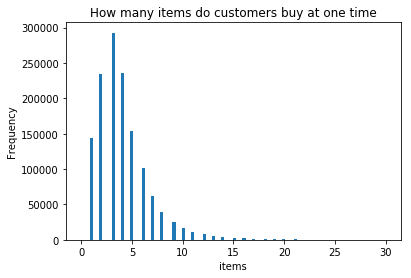

In [19]:
OrderOneTimeCount.plot(kind="hist",bins=100,range=(0,30),title="How many items do customers buy at one time")
plt.xlabel('items')
plt.show()


透過將消費者一次的購物項目視覺化可以發現 消費者一次的購物項目都是以小額為主 5件以下占大宗

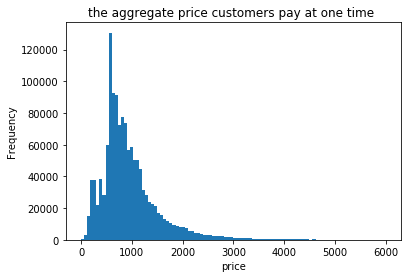

In [20]:
OrderOneTimeSum.plot(kind="hist",bins=100,range=(0,6000),title="the aggregate price customers pay at one time ")
plt.xlabel("price")
plt.show()

透過將消費者一次的購物總額視覺化可以發現 消費者一次的購物總額都是以500~1500元為主 也表示在app上面不太會買太昂貴的商品

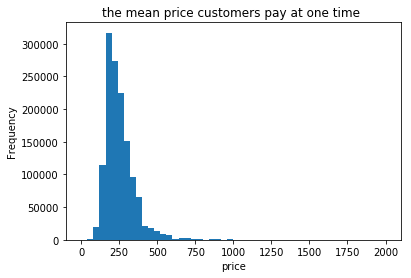

In [21]:
OrderOneTimeMean.plot(kind="hist",bins=50,range=(0,2000),title="the mean price customers pay at one time ")
plt.xlabel("price")
plt.show()

透過將消費者一次的購物平均金額視覺化可以發現 消費者一次的購物平均金額都是以150~500元為主 也表示在app上面不太會買太昂貴的商品

### 2.購物裝置為行動裝置(手機)還是電腦 

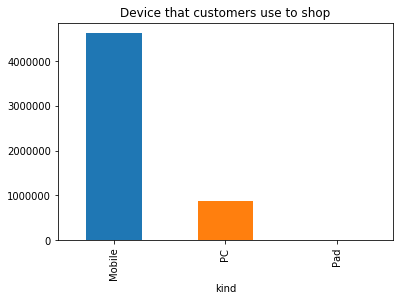

In [22]:
OrderDevice=Orders.groupby('TrackDeviceTypeDef')['TrackDeviceTypeDef'].count()
OrderDevice.plot(kind="bar",title="Device that customers use to shop")
plt.xlabel("kind")
plt.show()

由此長條圖可以看出消費者主要是在行動裝置例如:手機 上面進行購物

### 3.時間序列分析 訂單成立時間銷售行為 消費金額總額

In [23]:
Orders['DateId'] = Orders['DateId'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d'))
Orders=Orders.set_index('DateId')



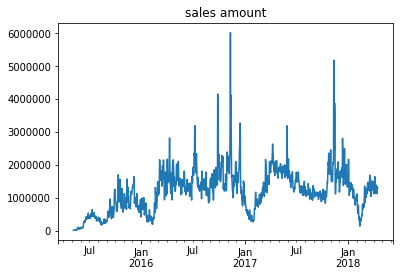

In [24]:
Orders.resample("D")['SalesOrderSlaveTotalPayment'].sum().plot()
plt.title("sales amount")
plt.xlabel("")
plt.show()

由此圖表可以發現91app主要的銷售旺季在夏季，反之 在冬天時，銷售總額大幅下降，
可以針對此表進而調查夏季跟冬季主要是賣出何種商品，並以此加強銷售或是行銷策略

### 4.訂單狀態 分布(成功 失敗 取消等)

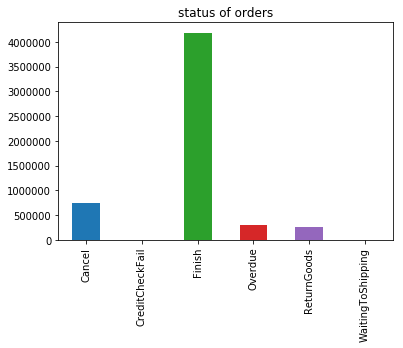

In [25]:
Orders.groupby('StatusDef')['StatusDef'].count().plot(kind="bar")
plt.title('status of orders')
plt.xlabel('')
plt.show()

可以發現消費者取消購物的次數太多，可以利用 購物車準備結帳時介面的行銷手法改善，確實的讓消費者完成購物行為
另外，系統逾時以及退貨的次數也不少，應該加強客服以及系統流程或是品質控管，以免因為一次不滿意的消費而流失消費者

### 5.台灣地區購買分布

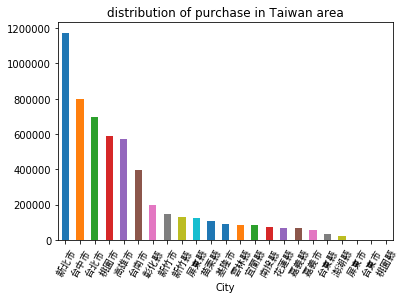

In [32]:
OrderCity=Orders.groupby('City')['City'].count()
OrderCity=OrderCity.sort_values(ascending=False).iloc[:23]
OrderCity.plot(kind="bar")
plt.xticks(fontproperties = prop, rotation = 60)
plt.title("distribution of purchase in Taiwan area")
plt.show()

可以發現主要的購買分布都是在都市，也就是資訊化相對較高的地方，可以去推廣資訊化較高但購買分布低的新興市場，
例如在此圖中的基隆或是新竹等地

### 6.會員 性別 年齡分布

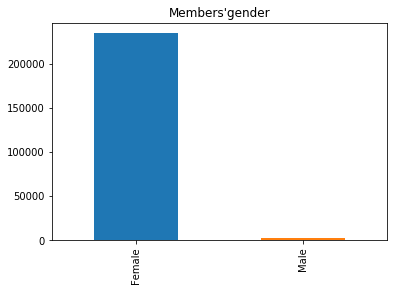

In [33]:
Member.groupby('GenderTypeDef')['GenderTypeDef'].count().plot(kind="bar")
plt.title('Members\'gender')
plt.xlabel('')
plt.show()

雖然原始資料有太多缺失值，不過以現有的資料來看，會員主要以女性為主，因此可以分為兩部分策略，
一是target女性消費者，將更多受女性青睞的品牌招攬成合作夥伴，以提高女性在91app的購買意願
二是開拓男性消費者，因為成長潛力可能更大

In [35]:
Member['age']=Member['Birthday'].str[0:4].apply(lambda x : 2019-float(x))
m=Member['age']<100 
Member['age']=Member[m]['age']
m1=Member['age']>0
Member['age']=Member[m1]['age']

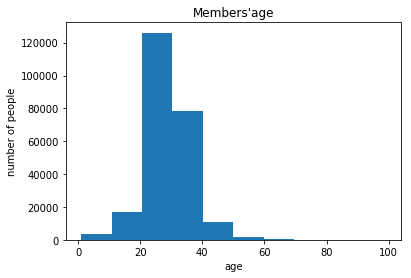

In [36]:
Member['age'].plot(kind="hist")
plt.title('Members\'age')
plt.xlabel("age")
plt.ylabel("number of people")
plt.show()

可以發現成員的年紀主要以20~40的人為主，可以以他們為主要客群，並去調查並推銷商品，更迎合他們的購物行為

### 7.時間序列分析 會員註冊的會員量

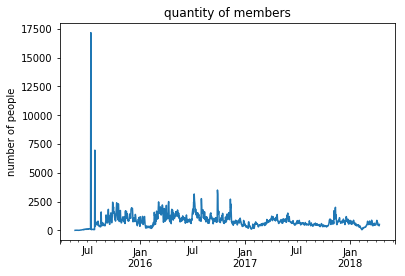

In [37]:
Member['Time']=Member['RegisterDateTime'].astype(str).str.split(' ')
Member['Time']=Member['Time'].apply(lambda x:x[0])
Member['Time']=Member['Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
Member=Member.set_index('Time')
Member.resample("D")['MemberId'].count().plot()
plt.title("quantity of members")
plt.xlabel("")
plt.ylabel("number of people")
plt.show()                                                                  


發現在2015年的夏天 註冊會員大幅上升，可以仔細推敲原因，並將可以類用的成功方法移植至今，想辦法提高會員註冊量

### 8.會員註冊為行動裝置(手機)還是電腦

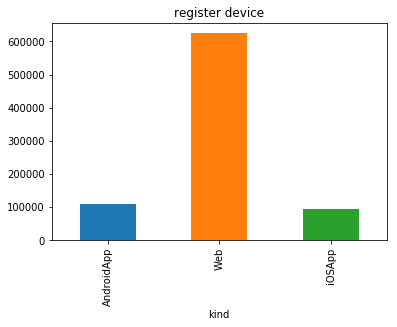

In [38]:
Member.groupby('RegisterSourceTypeDef')['RegisterSourceTypeDef'].count().plot(kind="bar")
plt.title("register device")
plt.xlabel("kind")
plt.show()

會員註冊主要是以網頁註冊為主，但透過之前消費裝置圖可以發現，在加入會員之後他們主要以行動裝置消費，
因此可以考慮改善在App上註冊會員的介面，或是投放數位廣告等，想辦法提高行動裝置會員註冊量

### 9.促銷的類型 

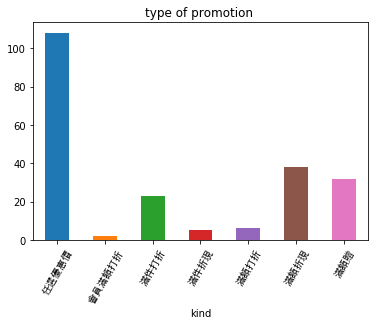

In [39]:
PromotionConditions.groupby('DiscountType')['DiscountType'].count().plot(kind="bar")
plt.xticks(fontproperties = prop, rotation = 60)
plt.title("type of promotion ")
plt.xlabel("kind")
plt.show()

91app的促銷類型主要以任選優惠價、滿額折現、滿額贈為主，可以根據此來深入調查這三種促銷方案的成效